# HOMEWORK - CHICAGO DATASET


Submitted by: 

Submission date:

**Instructions:** You will process and analyze a large data set that contains crimes reported in the city of Chicago from 2018 to 2021.

To load the data set and get the *crimes* dataframe correctly configured, execute the cells with the code provided in this notebook. This could take a few minutes after you start the execution of the code cells.

Once the *crimes* dataframe has been setup proceed to obtain 2 meaningful data analysis results from processing the *crimes* dataframe. Specific cells have been provided for you to describe the results of each of your data analysis procedures. You can add as many code cells as you want to complete each of your analysis and I also recommend that you add some explanatory cells (use Markdown) to provide some additional text with explanations of your analysis.


In [1]:
#EXECUTE THIS CELL to setup the modules you need
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
#Defining location of dataset 
filepath="/opt/datasets/ist652/Crimes/crimes_2018_2021.csv"

In [3]:
#EXECUTE THIS CELL to load the dataset into your environment - THIS WILL TAKE 3 TO 5 MINUTES - be patient
# a security warning will appear. You can ignore it.
crimes=pd.read_csv(filepath,parse_dates=[0], index_col=[0])

/tmp/ipykernel_235/312129446.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes=pd.read_csv(filepath,parse_dates=[0], index_col=[0])


In [4]:
crimes.head()  #just checking
crimes.sample()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
11675355,JC248782,5/3/2019 20:15,062XX N WINTHROP AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,True,2433,...,48.0,77.0,26,1167727.0,1941549.0,2019,5/10/2019 16:20,41.995159,-87.658374,"(41.995159052, -87.658373656)"


# Code for data analysis 1

You can place the code for your first data analysis result in this section. Add as many code cells as you need.

In [5]:
#Identifying the frequency of different types of crimes.
freq_crime_types=crimes['Primary Type'].value_counts()
freq_crime_types

Primary Type
THEFT                                209507
BATTERY                              181202
CRIMINAL DAMAGE                      104417
ASSAULT                               79577
DECEPTIVE PRACTICE                    72556
OTHER OFFENSE                         60372
NARCOTICS                             40918
MOTOR VEHICLE THEFT                   39478
BURGLARY                              36764
ROBBERY                               33459
WEAPONS VIOLATION                     29186
CRIMINAL TRESPASS                     21299
OFFENSE INVOLVING CHILDREN             8401
PUBLIC PEACE VIOLATION                 4764
SEX OFFENSE                            4477
INTERFERENCE WITH PUBLIC OFFICER       3820
CRIMINAL SEXUAL ASSAULT                3466
HOMICIDE                               2698
CRIM SEXUAL ASSAULT                    2464
ARSON                                  1858
PROSTITUTION                           1769
STALKING                                992
LIQUOR LAW VIOLATIO

In [6]:
# from the results we can see that theft is the most common primary crime

In [7]:
#which year had the most number of thefts
theft_data_set = crimes[crimes['Primary Type']=='THEFT']
theft_data_set['Year'].value_counts()

Year
2018    65268
2019    62440
2020    41053
2021    40746
Name: count, dtype: int64

In [8]:
#2018 has the highest number of thefts
theft_data_set_2018 = theft_data_set[theft_data_set['Year']==2018]

In [9]:
#which beat experienced the most number of thefts
theft_data_set_2018['Beat'].value_counts()

Beat
1834    1624
112     1596
111     1369
1831    1099
122     1059
        ... 
1125      65
2525      56
1654      45
1655      41
1652      20
Name: count, Length: 274, dtype: int64

###
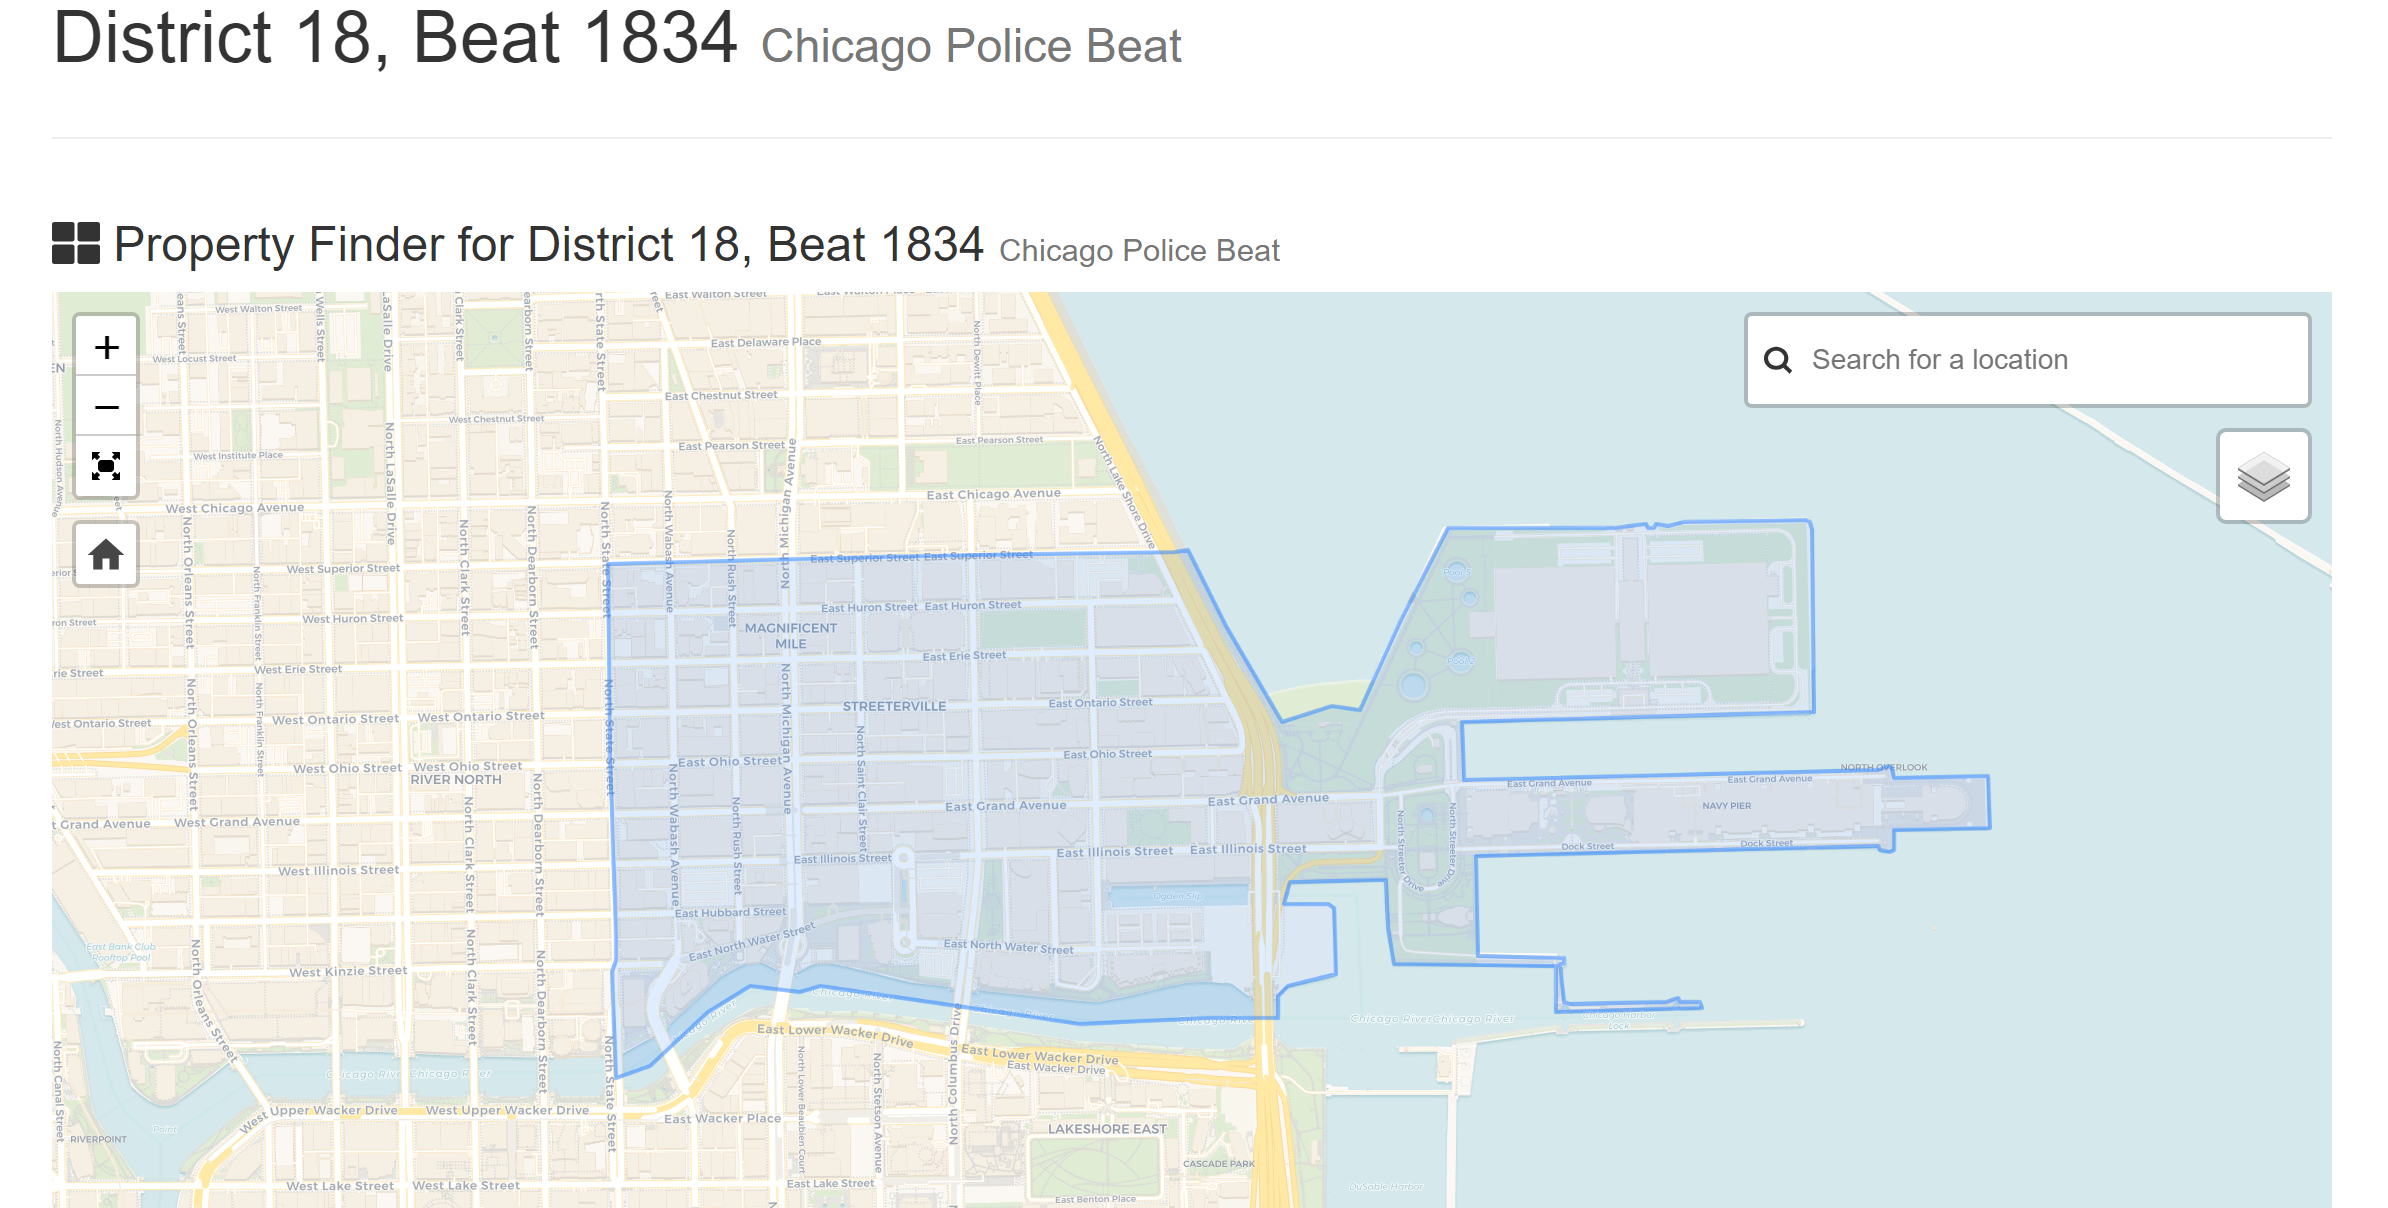



In [10]:
theft_data_set_2018['Location Description'].value_counts()
#based on the above data we can see that most of the thefts has taken place in the streets

Location Description
STREET                                   15305
RESIDENCE                                 5091
SMALL RETAIL STORE                        4427
APARTMENT                                 4186
DEPARTMENT STORE                          3577
                                         ...  
HOTEL / MOTEL                                1
BRIDGE                                       1
SCHOOL - PUBLIC BUILDING                     1
CHURCH / SYNAGOGUE / PLACE OF WORSHIP        1
NURSING / RETIREMENT HOME                    1
Name: count, Length: 110, dtype: int64

In [11]:
theft_data_set_2018['Description'].value_counts()
#based on the above data we can see that most of the thefts involved 500$ or lesser money

Description
$500 AND UNDER                 24837
OVER $500                      15294
FROM BUILDING                  10920
RETAIL THEFT                   10713
POCKET-PICKING                  2440
PURSE-SNATCHING                  589
ATTEMPT THEFT                    414
DELIVERY CONTAINER THEFT          41
FROM COIN-OP MACHINE/DEVICE       20
Name: count, dtype: int64

## Description of data analysis result 1

Use the next cell to describe your data analysis result 1

The data analysis reveals that theft is the most common type of crime recorded. In 2018, theft incidents peaked, marking the year with the highest number of theft cases. When analyzing specific locations, Beat 1834 experienced the most thefts, indicating that this area is particularly vulnerable to such incidents. A deeper dive into the data shows that the majority of thefts occurred on streets, suggesting a higher frequency of street crimes. Additionally, most of these thefts involved amounts of $500 or less, highlighting that lower-value thefts are more common in the dataset.

# Code for data analysis 2

You can place the code for your second data analysis result in this section. Add as many code cells as you need.

In [12]:
# Group by year and count the crimes for every year
total_crimes = crimes.groupby('Year')['Case Number'].count().reset_index()

# total crimes 
print(total_crimes)

   Year  Case Number
0  2018       268324
1  2019       260576
2  2020       210130
3  2021       207863


In [13]:
# Group by year and sum arrests 
total_arrests = crimes.groupby('Year')['Arrest'].sum()

#total arrests 
print(total_arrests)

Year
2018    53757
2019    56031
2020    33317
2021    25839
Name: Arrest, dtype: int64


In [16]:

# Group by year and sum arrests
total_arrests = crimes.groupby('Year')['Arrest'].sum()

# Convert the Series to a DataFrame
total_arrests_df = total_arrests.reset_index()

# Rename columns for clarity
total_arrests_df.columns = ['Year', 'Total_Arrests']

# Print the DataFrame to confirm
print(total_arrests_df)


   Year  Total_Arrests
0  2018          53757
1  2019          56031
2  2020          33317
3  2021          25839


In [40]:
# Group by year and count the crimes for each year
total_crimes = crimes.groupby('Year')['Case Number'].count().reset_index()

# Rename columns for clarity
total_crimes.columns = ['Year', 'Total_Crimes']

# Print the total crimes DataFrame
print(total_crimes)


   Year  Total_Crimes
0  2018        268324
1  2019        260576
2  2020        210130
3  2021        207863


In [39]:
crime_grouped = pd.merge(total_crimes, total_arrests, on='Year')

#Print the merged DataFrame to confirm
print(crime_grouped)

   Year  Total_Crimes  Arrest
0  2018        268324   53757
1  2019        260576   56031
2  2020        210130   33317
3  2021        207863   25839


In [19]:
print(crime_grouped.columns)


Index(['Year', 'Total_Crimes', 'Arrest'], dtype='object')


In [21]:
#Calculate the arrest rate (in percentage)
crime_grouped['Arrest_Rate'] = (crime_grouped['Arrest'] / crime_grouped['Total_Crimes']) * 100

print(crime_grouped)


   Year  Total_Crimes  Arrest  Arrest_Rate
0  2018        268324   53757    20.034361
1  2019        260576   56031    21.502748
2  2020        210130   33317    15.855423
3  2021        207863   25839    12.430784


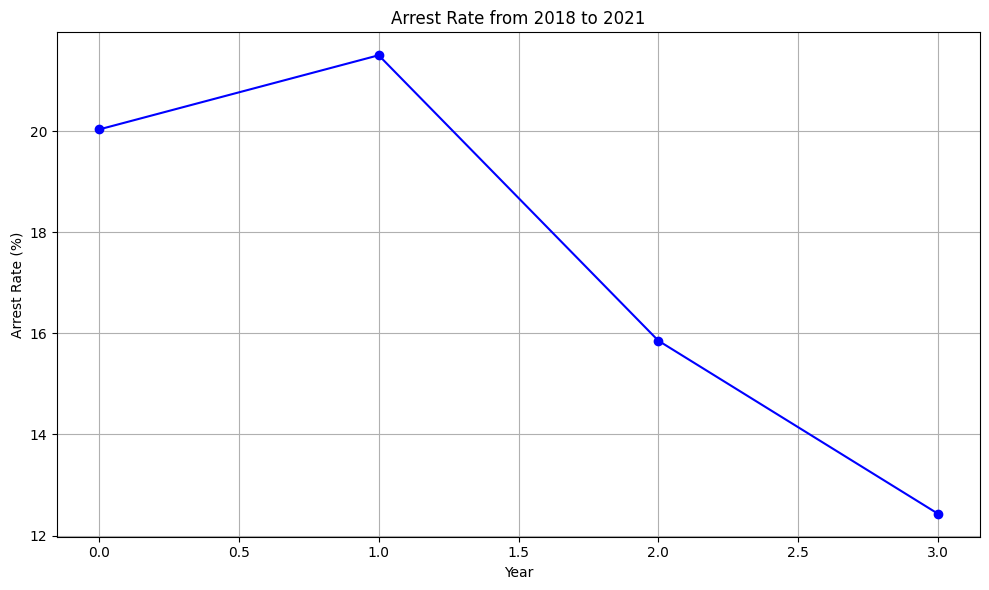

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(crime_grouped.index, crime_grouped['Arrest_Rate'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Arrest Rate (%)')
plt.title('Arrest Rate from 2018 to 2021')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
unnoticed_no_arrest = crimes[crimes['Arrest'] == False].groupby('Year').size()
print(unnoticed_no_arrest)

Year
2018    214567
2019    204545
2020    176813
2021    182024
dtype: int64


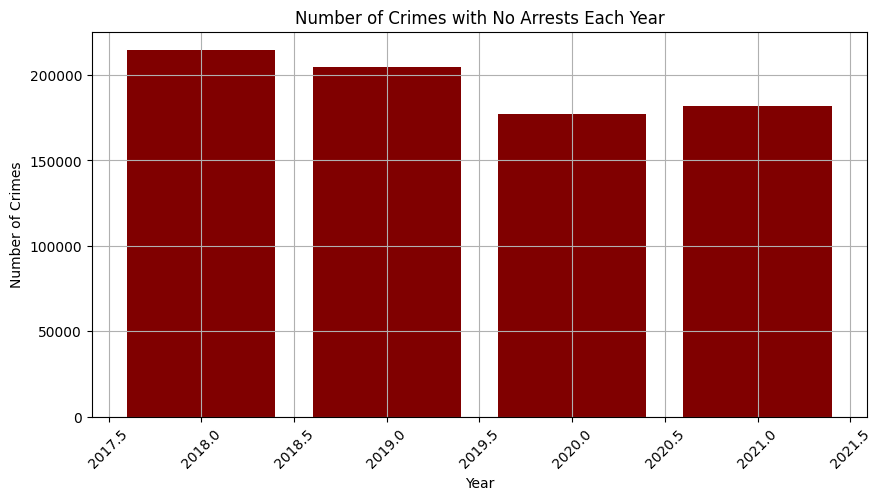

In [25]:
import matplotlib.pyplot as plt

# Plotting the number of crimes with no arrests each year
plt.figure(figsize=(10, 5))
plt.bar(unnoticed_no_arrest.index, unnoticed_no_arrest.values, color='maroon')
plt.title('Number of Crimes with No Arrests Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
unnoticed_combined = crimes[(crimes['Arrest'] == False) & (crimes[['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude']].isnull().any(axis=1))].groupby('Year').size()
print(unnoticed_combined)

Year
2018    3995
2019    1346
2020    1562
2021    3974
dtype: int64


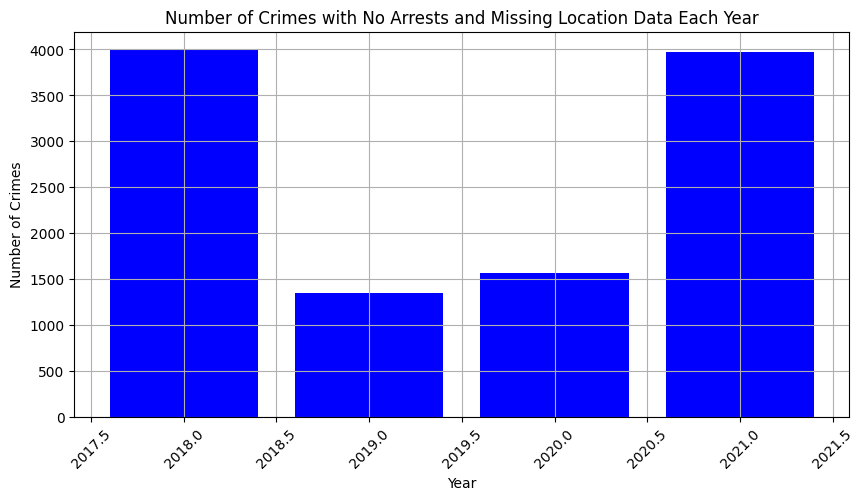

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(unnoticed_combined.index, unnoticed_combined.values, color='blue')
plt.title('Number of Crimes with No Arrests and Missing Location Data Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [28]:
# Convert to a DF
total_arrests_df = total_arrests.reset_index()
total_arrests_df.columns = ['Year', 'Total_Arrests']

In [32]:
# get crimes and arrests together
crime_grouped = pd.merge(total_crimes, total_arrests_df, on='Year')

In [33]:
# print results
print(crime_grouped)

   Year  Total_Crimes  Total_Arrests
0  2018        268324          53757
1  2019        260576          56031
2  2020        210130          33317
3  2021        207863          25839


In [38]:

#Calculate the arrest rate (in percentage)
crime_grouped['Arrest_Rate'] = (crime_grouped['Total_Arrests'] / crime_grouped['Total_Crimes']) * 100

# Print the DataFrame with the arrest rate included
print(crime_grouped)


   Year  Total_Crimes  Total_Arrests  Arrest_Rate
0  2018        268324          53757    20.034361
1  2019        260576          56031    21.502748
2  2020        210130          33317    15.855423
3  2021        207863          25839    12.430784


## Description of data analysis result 2

Use the next cell to describe your data analysis result 2


From 2018 to 2021, the total number of crimes went down from 268,324 in 2018 to 207,863 in 2021, and total arrests also dropped from 53,757 to 25,839. The arrest rate improved a bit from 20.03% in 2018 to 21.50% in 2019, but then it went down to 12.43% by 2021, even though there were fewer crimes. 

This suggests that the police may have faced challenges in making arrests during the COVID-19 pandemic. However, we cannot be certain of this without more data and evidence to support this conclusion.

insights from the analysis:

**No Arrests**: A significant portion of crimes each year did not lead to arrests, potentially pointing to gaps in the law enforcement process, insufficient evidence, or low prioritization of certain crime types.

**Missing Location Data**: Missing geographic data affected a smaller but notable number of cases, which impacts crime mapping and neighborhood-level insights.

**Unnoticed Crimes (No Arrest + Missing Location)**: Crimes that lacked both arrest and location data were fewer but represent critical gaps in the data, where both the outcome and tracking of the crime are missing.

This can be resolved by the following measures.

**Enhanced Data Collection**: Address missing location data through improved data collection methods. Efforts to ensure that every crime incident is properly geo-coded can help in more accurate crime analysis and hotspot mapping.

**Focus on Unresolved Cases**: Investigate and prioritize the categories of crimes where arrests were not made. Understanding why certain types of crimes remain unresolved could inform resource allocation or policy changes to improve crime resolution rates.

**Integrated Crime Mapping**: Combining arrest data with geographic information can be beneficial in understanding which areas have a higher likelihood of unnoticed or unresolved crimes. This could also guide predictive policing efforts.

**Note:** PLEASE SUBMIT YOUR HOMEWORK IN *ipynb* AND *pdf* formats. Use the "Download as" option in the "File" menu to get your download the notebook in those formats.